In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset, info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete31Y546/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
type(dataset)

list

In [ ]:
def split_dataset(dataset, train_r, val_r, test_r):
  size = len(dataset)
  train_dataset = dataset.take(int(train_r * size))

  val_t_dataset = dataset.skip(int(train_r * size))
  val_dataset = val_t_dataset.take(int(val_r * size))

  test_dataset = val_t_dataset.skip(int(val_r * size))

  return train_dataset, test_dataset, val_dataset

In [ ]:
train, test, val = split_dataset(dataset[0], 0.8, 0.1, 0.1)

In [ ]:
list(train.take(1))

[(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
  array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# **VISUALIZATION**

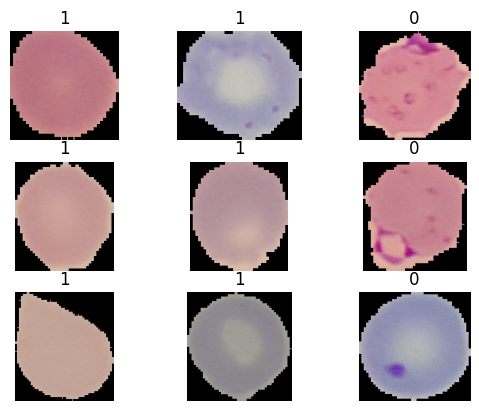

In [ ]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(str(label.numpy()))
  plt.imshow(img);

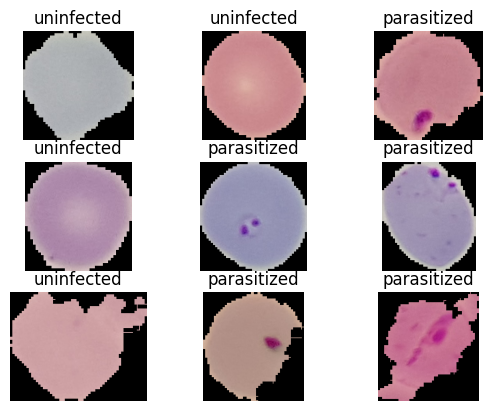

In [ ]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(info.features['label'].int2str(label))
  plt.imshow(img);

In [ ]:
# 0 - parasitized
# 1 - uninfected

# **PREPROCESSING**

In [ ]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE)) / 255.0, label

In [ ]:
train = train.map(resize_rescale)
val = val.map(resize_rescale)
test = test.map(resize_rescale)

In [ ]:
for i, l in train.take(1):
  print(i, l)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
train = train.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val = val.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test = test.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

# **MODEL BUILDING**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics='accuracy'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# saves the best model (or best weights - depends on args)
# It saves it every save_freq time
checkpoint_callback = ModelCheckpoint(
    'checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
)

In [ ]:
plateau_callback = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=2, verbose=1
)

In [ ]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=20,
    verbose=1,
    callbacks=[checkpoint_callback, plateau_callback]
)

Epoch 1/20
689/689 [==============================] - 96s 123ms/step - loss: 0.3449 - accuracy: 0.8429 - val_loss: 1.1733 - val_accuracy: 0.6534 - lr: 0.0100
Epoch 2/20
689/689 [==============================] - 54s 78ms/step - loss: 0.1997 - accuracy: 0.9335 - val_loss: 0.2188 - val_accuracy: 0.9267 - lr: 0.0100
Epoch 3/20
689/689 [==============================] - 44s 64ms/step - loss: 0.1843 - accuracy: 0.9398 - val_loss: 0.3676 - val_accuracy: 0.8505 - lr: 0.0100
Epoch 4/20
689/689 [==============================] - 44s 63ms/step - loss: 0.1633 - accuracy: 0.9495 - val_loss: 0.1975 - val_accuracy: 0.9434 - lr: 0.0100
Epoch 5/20
689/689 [==============================] - 51s 74ms/step - loss: 0.1522 - accuracy: 0.9522 - val_loss: 0.2050 - val_accuracy: 0.9321 - lr: 0.0100
Epoch 6/20
689/689 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9536
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
689/689 [==============================] -

In [ ]:
model.evaluate(test)

2757/2757 [==============================] - 20s 3ms/step - loss: 0.1642 - accuracy: 0.9474


[0.1642247885465622, 0.9474065899848938]

In [ ]:
y_pred = model.predict(test)

2757/2757 [==============================] - 18s 2ms/step


In [ ]:
y_pred

array([[0.973167  ],
       [0.8663734 ],
       [0.16580775],
       ...,
       [0.00119252],
       [0.96617293],
       [0.9382056 ]], dtype=float32)

In [ ]:
def parasite_or_not(img):
  if img < 0.5:
    return 'P😔'
  else:
    return 'U'

In [ ]:
y_pred

array([[0.973167  ],
       [0.8663734 ],
       [0.16580775],
       ...,
       [0.00119252],
       [0.96617293],
       [0.9382056 ]], dtype=float32)

In [ ]:
result_labels = []

for i in y_pred:
  result_labels.append(parasite_or_not(i[0]))

In [ ]:
result_labels[:5]

['U', 'U', 'P😔', 'P😔', 'P😔']

In [ ]:
len(result_labels)

2757

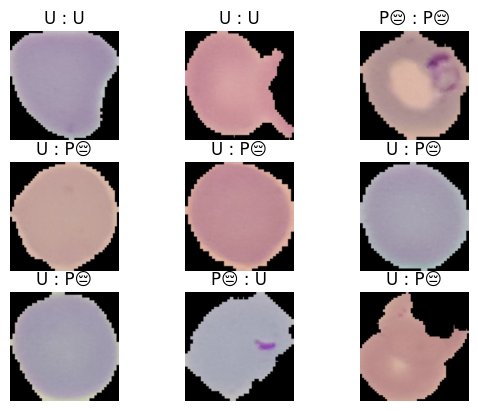

In [ ]:
for i, (img, label) in enumerate(test.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(f'{parasite_or_not(label.numpy()[0])} : {str(result_labels[i])}')
  plt.imshow(img[0]);

# **PROTECT MODEL FROM OVERFITTING**

In [ ]:
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout

In [ ]:
dropout_rate = 0.3
regularizer_coef = 0.01
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu', kernel_regularizer=L2(regularizer_coef)),
    BatchNormalization(),
    Dropout(dropout_rate),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu', kernel_regularizer=L2(regularizer_coef)),
    BatchNormalization(),
    Dropout(dropout_rate),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=L2(regularizer_coef)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Dense(10, activation='relu', kernel_regularizer=L2(regularizer_coef)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 222, 222, 6)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)     

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics='accuracy'
)

In [ ]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=20,
    verbose=1,
    callbacks=[checkpoint_callback, plateau_callback]
)

# **BUT LET'S MAKE IT EVEN BETTER, BY APPLYING DATA AUGMENTATION**

In [ ]:
def visualize_diff(image, augmented_img):
  plt.subplot(1, 2, 1)
  plt.title('Original Image: ')
  plt.imshow(image);

  plt.subplot(1, 2, 2)
  plt.title('Augmented Image: ')
  plt.imshow(augmented_img);

In [ ]:
or_image, lbl = next(iter(train))
augmented_img = tf.image.flip_left_right(or_image)

In [ ]:
visualize_diff(or_image[0], augmented_img[0])

In [ ]:
or_image, lbl = next(iter(train))
augmented_img = tf.image.rot90(or_image)

In [ ]:
visualize_diff(or_image[0], augmented_img[0])

In [ ]:
# 50% crop
or_image, lbl = next(iter(train))
augmented_img = tf.image.central_crop(or_image, 0.5)

In [ ]:
visualize_diff(or_image[0], augmented_img[0])

In [ ]:
# 80% brightness adjustment
or_image, lbl = next(iter(train))
augmented_img = tf.image.adjust_brightness(or_image, 0.8)

In [ ]:
visualize_diff(or_image[0], augmented_img[0])

In [ ]:
or_image, lbl = next(iter(train))
augmented_img = tf.image.random_saturation(or_image, lower=2, upper=12)

In [ ]:
visualize_diff(or_image[0], augmented_img[0])

In [ ]:
def augment(img, lbl):
  img, lbl = resize_rescale(img, lbl)
  img = tf.image.rot90(img)
  img = tf.image.adjust_saturation(img, saturation_factor=0.3)
  img = tf.image.flip_left_right(img)

  return img, lbl

In [ ]:
train, test, val = split_dataset(dataset[0], 0.8, 0.1, 0.1)

In [ ]:
test = test.map(resize_rescale)

In [ ]:
train = (train
    .shuffle(buffer_size=9, reshuffle_each_iteration=True)
    .map(augment)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

val = (val
    .shuffle(buffer_size=9, reshuffle_each_iteration=True)
    .map(resize_rescale)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)
test = test.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

# **FUNCTIONAL API**

In [ ]:
# I commented this section cuz it's kinda useless in this code
# But sometimes it's very useful
# So it's here anyway

In [ ]:
# from tensorflow.keras.layers import Input
# from tensorflow.keras.models import Model

In [ ]:
# func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='lenet model')

# x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)

# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(10, activation='relu')(x)
# x = BatchNormalization()(x)
# func_output = Dense(1, activation='sigmoid')(x)

# model = Model(func_input, func_output, name='lenet model')

In [ ]:
# model.summary()

In [ ]:
# func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='features_extr')

# x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
# x = BatchNormalization()(x)
# output = MaxPool2D(pool_size=2, strides=2)(x)


# feature_extractor = Model(func_input, output, name='features_extr')

In [ ]:
# func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='lenet model')

# x = feature_extractor(func_input)

# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(10, activation='relu')(x)
# x = BatchNormalization()(x)
# func_output = Dense(1, activation='sigmoid')(x)

# model = Model(func_input, func_output, name='lenet model')

In [ ]:
# model.summary()

In [ ]:
"""x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)"""

In [ ]:
# from tensorflow.keras.layers import Layer

In [ ]:
# class FeatureExtractor(Layer):
#   def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
#     super(FeatureExtractor, self).__init__()

#     self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
#     self.batch_1 = BatchNormalization()
#     self.pool_1 = MaxPool2D(pool_size, strides * 2)
#     self.conv_2 = Conv2D(filters=filters * 2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
#     self.batch_2 = BatchNormalization()
#     self.pool_2 = MaxPool2D(pool_size, strides * 2)
#   def call(self, x):
#     x = self.conv_1(x)
#     x = self.batch_1(x)
#     x = self.pool_1(x)
#     x = self.conv_2(x)
#     x = self.batch_2(x)
#     x = self.pool_2(x)

#     return x


# feature_sub_clssd = FeatureExtractor(8, 3, 1, 'valid', 'relu', 2)

In [ ]:
# class Lenet(Model):
#   def __init__(self, activation, output_activation):
#     super(Lenet, self).__init__()
#     self.feature_extractor = feature_sub_clssd

#     self.dense_1 = Dense(100, activation=activation)
#     self.flatten = Flatten()
#     self.batch = BatchNormalization()
#     self.dense_2 = Dense(10, activation=activation)
#     self.batch_2 = BatchNormalization()
#     self.dense_3 = Dense(1, activation=output_activation)

#   def call(self, x):

#     """
#     x = Flatten()(x)
#     x = Dense(100, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = Dense(10, activation='relu')(x)
#     x = BatchNormalization()(x)
#     func_output = Dense(1, activation='sigmoid')(x)
#     """
#     x = self.flatten(x)
#     x = self.dense_1(x)
#     x = self.batch(x)
#     x = self.dense_2(x)
#     x = self.batch_2(x)
#     x = self.dense_3(x)

#     return x

# lenet = Lenet('relu', 'sigmoid')
# lenet(tf.zeros([1, 224, 224, 3]))
# lenet.summary()

In [ ]:
# lenet.compile(
#     optimizer=Adam(learning_rate=0.01),
#     loss='categorical_crossentropy',
#     metrics='accuracy'
# )

In [ ]:
# hist = lenet.fit(
#     train,
#     validation_data=val,
#     epochs=20,
#     verbose=1
# )

<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>